In [9]:
import Master as M
import numpy as np
import Tag_Database as Tags
import os
import time
import concurrent.futures

os.system("Color 8a")
variables = vars(Tags)
variables = np.array(list(variables.items()))
variables = variables[134:]
Tag_List = []
for item in variables:
    Tag_List.append([item[1], False])
while True:
    temp_list = []
    Client = M.Make_Client("10.50.0.10")
    temp_list.append(M.Gather(Client, Tag_List))
    for item in range(len(temp_list)):
        print("{}: {:.3f}".format(Tag_List[item,0], temp_list[item]))
    Client.close()
    time.sleep(30)
    os.system('cls') 

AttributeError: 'ModbusIOException' object has no attribute 'registers'

In [4]:
import Master as M
import numpy as np
import Tag_Database as Tags
import os
import time
import concurrent.futures

os.system("Color 8a")
variables = vars(Tags)
variables = np.array(list(variables.items()))
variables = variables[134:]
while True:
    Client = M.Make_Client("10.50.0.10")
    Bool = False
    for item in variables:
        if "Pulsing_Output" in item[0]:
            Bool = True
        if Bool:
            print(item[0] + ": ",bool(M.Read(Client, item[1], Bool = Bool)))
        else:
            print(item[0] + ": ",round(M.Read(Client, item[1], Bool = Bool), 3))
    Client.close()
    time.sleep(30)
    os.system('cls') 


In [21]:
start = 134
variables = vars(Tags)
variables = np.array(list(variables.items()))
variables = variables[start:]
variables[:,1] = variables[:,1].astype(int)
variables = variables[variables[:,1].argsort()]
variables

array([['IR_Temp', 10101],
       ['VA_Temp', 10111],
       ['Heater_Amps_Set', 10107],
       ['Temperature_Set', 10303],
       ['Emission_Set', 10305],
       ['Voltage_Read', 10103],
       ['Current_Read', 10105],
       ['Impedance_Read', 10121],
       ['Power_Read', 10123],
       ['Emitted_Current', 11103],
       ['DBA_Bypass', 11109],
       ['Recirculator_Halfway', 11111],
       ['Recirculator_Bypass', 11113],
       ['RF_Beam_Mon', 11117],
       ['Pulse_Frequency', 10309],
       ['Pulse_Duty', 10311],
       ['Pulse_Delay', 13013],
       ['CU_Pf', 1101],
       ['CU_Pr', 1103],
       ['CU_Pt', 1105],
       ['CU_V', 1115],
       ['BH_Pf', 21225],
       ['BH_Pr', 21227],
       ['BH_Pt', 21229],
       ['SRF_Pf', 2101],
       ['SRF_Pr', 2103],
       ['SRF_Pt', 2105],
       ['HV_Bias', 11101],
       ['HV_Off_Setpoint', 11301],
       ['HV_On_Setpoint', 11303],
       ['Trek_V', 11501],
       ['Trek_I', 11503],
       ['V0_SP', 11311],
       ['V0_Read', 11101],


In [7]:
import Master as M
from datetime import datetime
import numpy as np

def Snapshot(Client, filename, start = 8):
    import Tag_Database as Tags
    
    M.Read(Client,Tags.CU_V)
    "Here "
    variables = vars(Tags)
    variables = np.array(list(variables.items()))
    variables = variables[start:]
    #variables[:,1] = variables[:,1].astype(int)
    #variables = variables[variables[:,1].argsort()]
    Tag_List = []
    for item in variables:
        Tag_List.append([item[1], False])
            
    temp_list = []
    temp_list.append(M.Gather(Client, Tag_List, count = 20, sleep_time = 0.010))
    
    with open(filename,'w') as f: #Opening a file with the current date and time
        for num, line in enumerate(temp_list[0]):
            f.write(variables[num,0] + ": " + str(line).strip("([])")+'\n') #Writing each line in that file
        f.close() #Closing the file to save it
        
now = datetime.today().strftime('%y%m%d_%H%M') #Taking the current time in YYMMDD_HHmm format to save the plot and the txt file
filename = now + '.txt'

Client = M.Make_Client('10.50.0.10')

Snapshot(Client, filename)

In [15]:
import numpy as np

def price_per_square_inch(Radius, Cost):
    Area = np.pi * Radius **2
    PPSI = Cost/Area
    IPD = Area/Cost
    return PPSI, Area, IPD
numlines = 33

small = price_per_square_inch(8, 9.70)
medium = price_per_square_inch(12, 15.50)
large = price_per_square_inch(14, 16.99)
xl = price_per_square_inch(16, 24.80)

print("-"*numlines + "Small" + "-"*numlines)
print("{:.2f} square inches at ${:.3f} per square inch; {:.2f} inches per dollar\n".format(small[1],small[0], small[2]))
print("-"*numlines + "Medium" + "-"*numlines)
print("{:.2f} square inches at ${:.3f} per square inch; {:.2f} inches per dollar\n".format(medium[1],medium[0], medium[2]))
print("-"*numlines + "Large" + "-"*numlines)
print("{:.2f} square inches at ${:.3f} per square inch; {:.2f} inches per dollar\n".format(large[1],large[0], large[2]))
print("-"*numlines + "X-Large" + "-"*numlines)
print("{:.2f} square inches at ${:.3f} per square inch; {:.2f} inches per dollar\n".format(xl[1],xl[0], xl[2]))

---------------------------------Small---------------------------------
201.06 square inches at $0.048 per square inch; 20.73 inches per dollar

---------------------------------Medium---------------------------------
452.39 square inches at $0.034 per square inch; 29.19 inches per dollar

---------------------------------Large---------------------------------
615.75 square inches at $0.028 per square inch; 36.24 inches per dollar

---------------------------------X-Large---------------------------------
804.25 square inches at $0.031 per square inch; 32.43 inches per dollar



(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

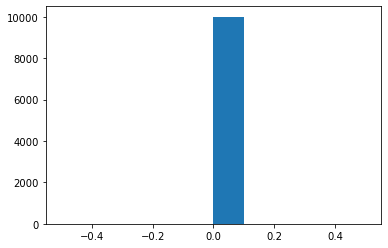

In [21]:
import time
import matplotlib.pyplot as plt

sleep_time = 0

iis = []
for _ in range(10000):
    i = 0
    runtime = time.time()
    while time.time() - runtime < sleep_time:
        i += 1
    iis.append(i)
plt.hist(iis)